In [1]:
import pandas as pd
df_train=pd.read_csv("train.csv")

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
df_train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with Only Girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible Thank you
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through WhatsApp\r\n\r\nI am unaware how he has recieved my contacts list from my phone\r\n\r\nPlease help
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for money by adding sections in the text messages \r\nI request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she will send new phone of vivo and I received that parcel through post on th February to Kurnool head post office where I have not received any mobile


In [4]:
print("Dataset Shape:", df_train.shape)
print("\nColumns in the dataset:", df_train.columns.tolist())

Dataset Shape: (93686, 3)

Columns in the dataset: ['category', 'sub_category', 'crimeaditionalinfo']


## **Missing Values, Removing Noise, Duplicates, Charecters Length < 150**

In [5]:
df_train_cleaned = df_train.copy()
df_train_cleaned.dropna(subset=['crimeaditionalinfo'] ,inplace=True)

In [6]:
# Import required libraries
import re
import unicodedata
import contractions

# Fix encoding and handle accented characters
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: unicodedata.normalize('NFKD', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

# # Expand contractions
# df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: contractions.fix(x)) ## MULTILINGUAL CONSTRAINTS

# Remove noise (Including periods)
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.lower())
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'\S+@\S+', '', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Remove all punctuation including periods
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Normalize whitespace
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_train_cleaned['crimeaditionalinfo'] = df_train_cleaned['crimeaditionalinfo'].apply(lambda x: x.strip())

In [7]:
# 2. Missing values
print(df_train_cleaned.isnull().sum())

category                 0
sub_category          6591
crimeaditionalinfo       0
dtype: int64


In [8]:
# df_train_cleaned=df_train_cleaned.dropna(subset=["crimeaditionalinfo"])

In [9]:
# 3. Duplicates
print(df_train_cleaned.duplicated().sum())

13703


In [10]:
df_train_cleaned=df_train_cleaned.drop_duplicates()

In [11]:
print(df_train_cleaned['crimeaditionalinfo'].duplicated().sum())

563


In [12]:
df_train_cleaned = df_train_cleaned.drop_duplicates(subset=['crimeaditionalinfo'])

In [13]:
# 4. Character length check
count_less_than_150 = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.len() <= 150].shape[0]
print("Number of rows with less than 150 characters in the crimeaditionalinfo column:", count_less_than_150)

Number of rows with less than 150 characters in the crimeaditionalinfo column: 6745


In [14]:
# Keep only rows where text length is > 150 characters
df_train_cleaned = df_train_cleaned[df_train_cleaned['crimeaditionalinfo'].str.len() > 150]

# Reset index
df_train_cleaned.reset_index(drop=True, inplace=True)


In [15]:
df_train_cleaned.shape

(72654, 3)

In [16]:
df_train_cleaned.sample(2)

,category,sub_category,crimeaditionalinfo
34300,Cyber Attack/ Dependent Crimes,Malware Attack,the issue actually started when i got this email which at first glance seemed like spam i usually ignore such things but for some reason i opened it this time afterward my phone started freezing and it wasnt normal i thought it was a technical glitch but now im not so sure honestly its such a mess and i dont even know where to start ive contacted support but they keep giving me the runaround the more i tried to fix it the more problems came up my bank account was suspecious and then i got locked out of everything this has really left me anxious and frustrated i cant sleep knowing my information is out there ive even considered deleting all my accounts but thats not a solution even my laptop isnt working right anymore its so stange how everything just fell apart after that one email
3917,Online Financial Fraud,UPI Related Frauds,impersonation cheating victim has a business suspect contacted as buyer and sent a notification that money was sent victim believed and she returned the excess amountafter that she realised that fraud is happenedand called to us


## **Checking for Target Categories and Subcategories**

In [17]:
target_cat = [
    "Online Financial Fraud",
    "Rape/Gang Rape (RGR) - Sexually Abusive Content",
    "Sexually Explicit Act",
    "Sexually Obscene Material",
    "Child Pornography (CP) - Child Sexual Abuse Material (CSEAM)",
    "Online and Social Media Related Crime",
    "Hacking/Damage to computer, computer systems etc.",
    "Online Cyber Trafficking",
    "Online Gambling/Betting",
    "Ransomware",
    "Cryptocurrency Crime",
    "Cyber Terrorism",
    "Any Other Cyber Crime"
]

target_subcat = [
    "Aadhar Enabled Payment System (AEPS)",
    "Business Email Compromise/Email Takeover",
    "Debit/Credit Card Fraud/Sim Swap Fraud",
    "Demat/Depository Fraud",
    "E-Wallet Related Fraud",
    "Fraud Call/Vishing",
    "Internet Banking Related Fraud",
    "UPI Related Frauds",
    "Cheating by Impersonation",
    "Cyber Bullying / Stalking / Sexting",
    "E-Mail Phishing",
    "Fake/Impersonating Profile",
    "Impersonating Email",
    "Intimidating Email",
    "Online Job Fraud",
    "Online Matrimonial Fraud",
    "Profile Hacking/Identity Theft",
    "Provocative Speech for Unlawful Acts",
    "Damage to computer, computer systems etc.",
    "Email Hacking",
    "Tampering with computer source documents",
    "Unauthorised Access/Data Breach",
    "Website Defacement/Hacking",
    "Online Trafficking",
    "Online Gambling/Betting",
    "Ransomware",
    "Cryptocurrency Fraud",
    "Cyber Terrorism",
    "Other"
]

In [18]:
print(df_train_cleaned["sub_category"].nunique())
print(df_train_cleaned["category"].nunique())

35
15


In [19]:
# For categories
print("Unique categories in training set:")
train_cat=df_train_cleaned["category"].unique()
print(train_cat)
print(len(train_cat))

# For subcategories
print("\nUnique subcategories in training set:")
train_subcat=df_train_cleaned["sub_category"].unique()
print(train_subcat)
print(len(train_subcat))

Unique categories in training set:
['Online and Social Media Related Crime' 'Online Financial Fraud'
 'Online Gambling  Betting' 'RapeGang Rape RGRSexually Abusive Content'
 'Any Other Cyber Crime' 'Cyber Attack/ Dependent Crimes'
 'Cryptocurrency Crime' 'Sexually Explicit Act'
 'Sexually Obscene material'
 'Hacking  Damage to computercomputer system etc' 'Cyber Terrorism'
 'Child Pornography CPChild Sexual Abuse Material CSAM'
 'Online Cyber Trafficking' 'Ransomware' 'Report Unlawful Content']
15

Unique subcategories in training set:
['Cyber Bullying  Stalking  Sexting' 'Fraud CallVishing'
 'Online Gambling  Betting' 'Online Job Fraud' 'UPI Related Frauds' nan
 'Other' 'Profile Hacking Identity Theft'
 'DebitCredit Card FraudSim Swap Fraud' 'Internet Banking Related Fraud'
 'Data Breach/Theft'
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
 'FakeImpersonating Profile' 'EWallet Related Fraud'
 'Cryptocurrency Fraud' 'Malware Attack'
 'Business Email Compromise

In [20]:
#Elements in list1 but not in list2 #CATEGORIES

# Train Data
diff1 = list(set(target_cat) - set(train_cat))
print(diff1)

diff1 = list(set(train_cat) - set(target_cat))
print(diff1)

['Online Gambling/Betting', 'Child Pornography (CP) - Child Sexual Abuse Material (CSEAM)', 'Sexually Obscene Material', 'Hacking/Damage to computer, computer systems etc.', 'Rape/Gang Rape (RGR) - Sexually Abusive Content']
['Online Gambling  Betting', 'Cyber Attack/ Dependent Crimes', 'Hacking  Damage to computercomputer system etc', 'Report Unlawful Content', 'Child Pornography CPChild Sexual Abuse Material CSAM', 'RapeGang Rape RGRSexually Abusive Content', 'Sexually Obscene material']


In [21]:
#Elements in list1 but not in list2 #SUBCATEGORIES

# Train Data
diff1 = list(set(target_subcat) - set(train_subcat))
print(diff1)

diff1 = list(set(train_subcat) - set(target_subcat))
print(diff1)

['E-Wallet Related Fraud', 'Online Gambling/Betting', 'Fraud Call/Vishing', 'Unauthorised Access/Data Breach', 'Debit/Credit Card Fraud/Sim Swap Fraud', 'Website Defacement/Hacking', 'Cyber Bullying / Stalking / Sexting', 'Provocative Speech for Unlawful Acts', 'Aadhar Enabled Payment System (AEPS)', 'Fake/Impersonating Profile', 'Damage to computer, computer systems etc.', 'Demat/Depository Fraud', 'Profile Hacking/Identity Theft', 'E-Mail Phishing', 'Business Email Compromise/Email Takeover']
['FakeImpersonating Profile', 'SQL Injection', 'Business Email CompromiseEmail Takeover', 'Fraud CallVishing', 'Profile Hacking Identity Theft', 'Against Interest of sovereignty or integrity of India', 'Unauthorised AccessData Breach', 'Damage to computer computer systems etc', 'EWallet Related Fraud', 'Provocative Speech for unlawful acts', 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks', 'Data Breach/Theft', 'DematDepository Fraud', 'EMail Phishing', 'Ransomware Attack',

**Insights: Differences in Categories & Subcategories in Training and Testing Data Compared to Our List of Target Categories and Subcategories**  

1. Presence of extra categories and subcategories  
    - Categories extra in training dataset - Report Unlawful Content, Cyber Attack/ Dependent Crimes
    - Categories extra in testing dataset - Crime Against W&C, Cyber Attack/ Dependent Crimes
    - Subcategories extra in training dataset - Against Interest of sovereignty or integrity of India, *Ransomware Attack*, Hacking/Defacement, Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks, Malware Attack, SQL Injection, Data Breach/Theft, nan
    - Subcategories extra in training dataset - *Ransomware Attack*, Sexual Harrasement, Hacking/Defacement, Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks, Cyber Blackmailing & Threatening, Malware Attack, SQL Injection, Data Breach/Theft, Computer Generated CSAM/CSEM, nan
    - Not present Subcategory in training & testing dataset - Aadhar Enabled Payment System (AEPS) - 
2. Differences in spelling
3. Repeated Category/Subcategory (Subcategory - Ransomeware, Ransomeware Attack)

**Solution**

1. Report Unlawful Content (***always recheck the column name detected vs dropped***)

In [22]:
filtered_rows_1 = df_train_cleaned[df_train_cleaned["category"] == 'Report Unlawful Content']

In [23]:
filtered_rows_1

,category,sub_category,crimeaditionalinfo
65628,Report Unlawful Content,Against Interest of sovereignty or integrity of India,the lady in the attached videos goes by the name swathi iyer on the social media platform clubhouse here she is seen sharing stage with people who abuse people just because they support the current government and pm narendra modi in the video she is seen sharing stage with people who support the separatist movements of punjab kashmir and tamil nadu these people belong to the same group as the recently arrested kashmiri separatist mir mushtaq request you to take cognizance and act accordingly


In [24]:
df_train_cleaned.iloc[65628]

category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Report Unlawful Content
sub_category                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Against Interest

In [25]:
df_train_cleaned = df_train_cleaned.drop(65628).reset_index(drop=True)

2. Cyber Attack/ Dependent Crimes

In [26]:
filtered_rows_2 = df_train_cleaned[df_train_cleaned["category"] == 'Cyber Attack/ Dependent Crimes']

In [27]:
filtered_rows_2.shape

(3608, 3)

In [28]:
filtered_rows_2.head()

,category,sub_category,crimeaditionalinfo
18,Cyber Attack/ Dependent Crimes,Data Breach/Theft,the issue actually started when i got this email which at first glance seemed like spam i usually ignore such things but for some reason i opened it this time afterward my phone started freezing and it wasnt normal i thought it was a technical glitch but now im not so sure honestly its such a mess and i dont even know where to start ive contacted support but they keep giving me the runaround the more i tried to fix it the more problems came up my bank account was notifiction and then i got locked out of everything the worst part is i dont even know who to trust anymore friends family everyones acting strange its affecting my relationships and my mental health even my laptop isnt working right anymore its so stange how everything just fell apart after that one email
21,Cyber Attack/ Dependent Crimes,Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks,i never imagined something like this could happen to me especially since im so cautious but then i started noticing that my online activity felt different slower even i cant even describe it well because everything seemed normal except for the fact that i was constantly getting logged out of my accounts i dont know how but its like they knew everything i was doing even though i was trying to be careful its terrifying to think about the more i tried to fix it the more problems came up my email was hackd and then i got locked out of everything i dont think ive ever felt this violated before my privacy is completely shattered and i cant do anything to make it stop even my laptop isnt working right anymore its so stange how everything just fell apart after that one email
42,Cyber Attack/ Dependent Crimes,Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks,my friend mentioned something like this happened to them a few months ago but i thought it was a oneoff then suddenly i got this weird notification asking me to update my password but the message didnt look like the usual ones i receive from the app it looked a bit off looking back maybe i should have paid more attention to the little details but now its too late my accounts are compromised the more i tried to fix it the more problems came up my social media was stange and then i got locked out of everything i feel so helpless like theres nothing i can do to fix this no matter how many times i change my password its like someones always one step ahead even my tablet isnt working right anymore its so stange how everything just fell apart after that one email
50,Cyber Attack/ Dependent Crimes,Malware Attack,my friend mentioned something like this happened to them a few months ago but i thought it was a oneoff then suddenly i got this weird notification asking me to update my password but the message didnt look like the usual ones i receive from the app it looked a bit off its hard to explain but it felt like someone was inside my account doing things while i wasnt even online the more i tried to fix it the more problems came up my work account was recived and then i got locked out of everything i feel so helpless like theres nothing i can do to fix this no matter how many times i change my password its like someones always one step ahead even my tablet isnt working right anymore its so stange how everything just fell apart after that one email
87,Cyber Attack/ Dependent Crimes,Hacking/Defacement,the issue actually started when i got this email which at first glance seemed like spam i usually ignore such things but for some reason i opened it this time afterward my phone started freezing and it wasnt normal i thought it was a technical glitch but now im not so sure looking back maybe i should have paid more attention to the little details but now its too late my accounts are compromised the more i tried to fix it the more problems came up my bank account was recived and then i got locked out of everything i feel

In [29]:
def unique_subcategories(df, category_name):
    return df[df['category'] == category_name]['sub_category'].unique()

unique_subs = unique_subcategories(df_train_cleaned, "Cyber Attack/ Dependent Crimes")
print("Unique Subcategories:", unique_subs)

Unique Subcategories: ['Data Breach/Theft'
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
 'Malware Attack' 'Hacking/Defacement' 'SQL Injection' 'Ransomware Attack'
 'Tampering with computer source documents']


In [30]:
df_train_cleaned = df_train_cleaned[df_train_cleaned['category'] != 'Cyber Attack/ Dependent Crimes']

In [31]:
df_train_cleaned.shape

(69045, 3)

In [62]:
df_train_cleaned.to_csv("cleaned_train.csv", index=False)

-------***Data Preprocessing Done***-------

## **Data Division for Multi-Model Training Framework**

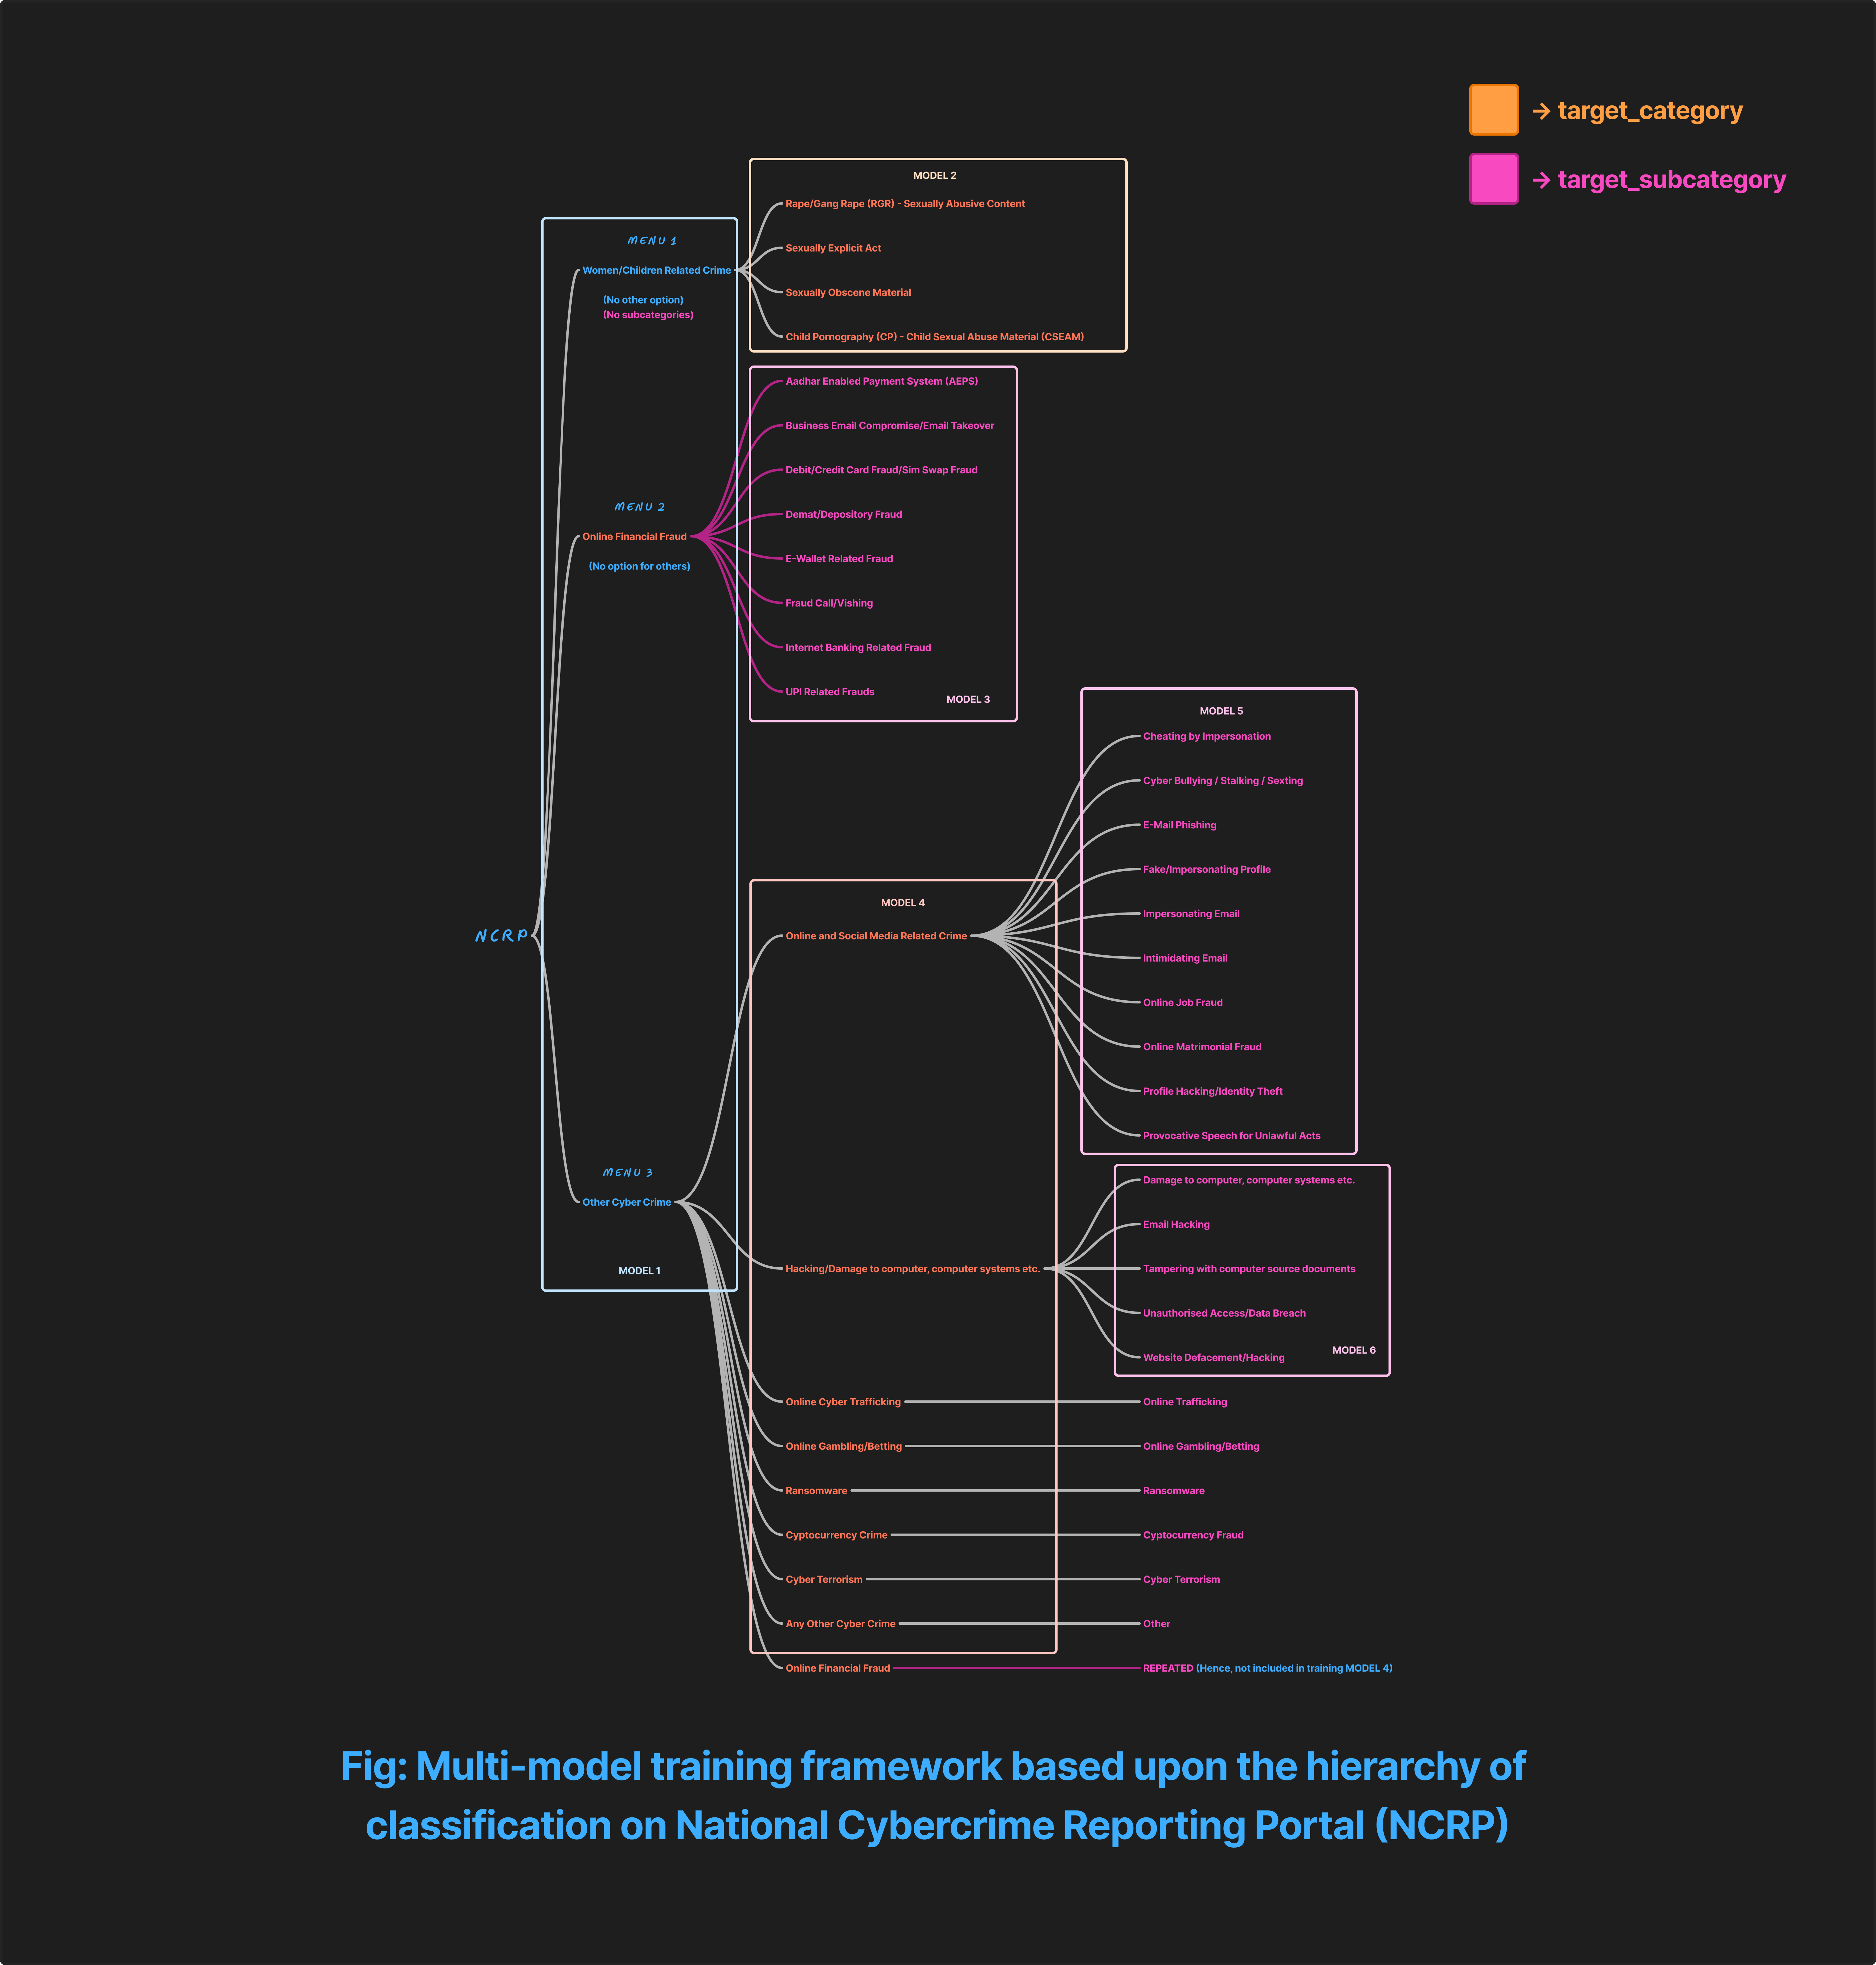

### 1. Choice between menus

In [32]:
model_1_filtered = df_train_cleaned.copy()

# Define a mapping dictionary for category-to-main_menu assignment
category_mapping = {
    "Other Cyber Crime": [
        "Online and Social Media Related Crime", "Online Gambling  Betting", "Any Other Cyber Crime",
        "Hacking  Damage to computercomputer system etc", "Cyber Terrorism", "Online Cyber Trafficking",
        "Ransomware", "Cryptocurrency Crime"
    ],
    "Women Children Related Crime": [
        "RapeGang Rape RGRSexually Abusive Content", "Sexually Explicit Act", "Sexually Obscene material",
        "Child Pornography CPChild Sexual Abuse Material CSAM"
    ],
    "Online Financial Fraud": "Online Financial Fraud"}

# Create a function to map categories
def get_main_menu(category):
    for main_menu, categories in category_mapping.items():
        if category in categories:
            return main_menu
    return "Unknown"  # Default value for unmapped categories

# Apply the mapping
model_1_filtered["main_menu"] = model_1_filtered["category"].apply(get_main_menu)
model_1_filtered.shape


(69045, 4)

In [33]:
model_1_filtered.head()

,category,sub_category,crimeaditionalinfo,main_menu
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,i had continue received random calls and abusive messages in my whatsapp someone added my number in a unknown facebook group name with only girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible thank you,Other Cyber Crime
1,Online Financial Fraud,Fraud CallVishing,the above fraudster is continuously messaging me and asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through whatsapp i am unaware how he has recieved my contacts list from my phone please help,Online Financial Fraud
2,Online Gambling Betting,Online Gambling Betting,he is acting like a police and demanding for money by adding sections in the text messages i request you to take an immediate action on him frequently he is harassing with these messages for reference please find attached files,Other Cyber Crime
3,Online and Social Media Related Crime,Online Job Fraud,in apna job i have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when i have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss,Other Cyber Crime
4,Online Financial Fraud,Fraud CallVishing,i received a call from lady stating that she will send new phone of vivo and i received that parcel through post on th february to kurnool head post office where i have not received any mobile,Online Financial Fraud


In [34]:
# CHECK FOR IMBALANCED DATA
menu_counts = model_1_filtered.groupby("main_menu").size()
print(menu_counts)

main_menu
Online Financial Fraud          41293
Other Cyber Crime               24116
Women Children Related Crime     3636
dtype: int64


In [35]:
# REARRANGING DATAFRAME FOR MODEL TRAINING
model_1_filtered.drop(columns=['category'], inplace=True)
model_1_filtered.drop(columns=['sub_category'], inplace=True)
model_1_filtered.rename(columns={'main_menu': 'target_label'}, inplace=True)

In [36]:
model_1_filtered.head()

,crimeaditionalinfo,target_label
0,i had continue received random calls and abusive messages in my whatsapp someone added my number in a unknown facebook group name with only girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible thank you,Other Cyber Crime
1,the above fraudster is continuously messaging me and asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through whatsapp i am unaware how he has recieved my contacts list from my phone please help,Online Financial Fraud
2,he is acting like a police and demanding for money by adding sections in the text messages i request you to take an immediate action on him frequently he is harassing with these messages for reference please find attached files,Other Cyber Crime
3,in apna job i have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when i have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss,Other Cyber Crime
4,i received a call from lady stating that she will send new phone of vivo and i received that parcel through post on th february to kurnool head post office where i have not received any mobile,Online Financial Fraud


In [ ]:
# model_1_filtered.to_csv("model_1_filtered.csv", index=False)

### 2. Women/child related crime 

In [37]:
categories_to_include = ['RapeGang Rape RGRSexually Abusive Content', 'Sexually Explicit Act', 'Sexually Obscene material', 'Child Pornography CPChild Sexual Abuse Material CSAM']

# Filter the DataFrame
model_2_filtered = df_train_cleaned[df_train_cleaned["category"].isin(categories_to_include)]
model_2_filtered.shape

(3636, 3)

In [38]:
# CHECK FOR IMBALANCED DATA
category_counts = model_2_filtered.groupby("category").size()
print(category_counts)

category
Child Pornography CPChild Sexual Abuse Material CSAM     336
RapeGang Rape RGRSexually Abusive Content                232
Sexually Explicit Act                                   1394
Sexually Obscene material                               1674
dtype: int64


In [39]:
# REARRANGING DATAFRAME FOR MODEL TRAINING
model_2_filtered.drop(columns=['sub_category'], inplace=True)
model_2_filtered.rename(columns={'category': 'target_label'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20660\3430813436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_2_filtered.drop(columns=['sub_category'], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20660\3430813436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_2_filtered.rename(columns={'category': 'target_label'}, inplace=True)


In [40]:
model_2_filtered.head()

,target_label,crimeaditionalinfo
7,RapeGang Rape RGRSexually Abusive Content,i got the message on whatsapp to my number the message contains very abusive words this message also includes my friend name and his number in that the same message was forwarded to all other friends also for more details please look into the file attached here please take action asap
22,RapeGang Rape RGRSexually Abusive Content,respected sir a very serious matter i want to inform you few person running or involve in some very shamefull activities by using few women at many places of kolkata gariahat ballygunge ruby hospital behind area kasba anandapur quest mall metropolis mall area acropolismall area park circus forum mall elgin rd parkstreet maidan area esplanade garia jadavpur behalasakherbazar joka bansdroni rabindrasadanexide area haridevpur triangular park lake mall area rashbehari area tollygunge thakurpukur bbd bag dalhousie area and saltlake their name subhro saha amlan datta izaz ahmed anirban they officially work in a insurance office hdfclife a hindustanpark ab gariahat shopping mall st floor beside of reliance trend building near gariahat more but outside at several places they involve in some shamefull activities last years sir a person subhro saha forcefully involve few women employee ex female employee in such shamefull doing at afternoon evening or after evening or night time they doing this shamefull activities many innocent people are trapped and suffering in such dirty issue for long time they are even to lodge a complain against them because of threatening and blackmailing issue from above address places and their mobile whatsapp no you can easily trace and track their all activities you need to investigate last years detail please help
34,Sexually Explicit Act,above link is correct video url she is one of our relative please help her now she is going to get marry other person they are not aware of this information while its recording some malwere functionality has recorded without their permission please help her and remove the above video
38,Sexually Obscene material,many fake accounts are created and im suffering since year vulgar language chatting in instagram with my friends and family members and they are also suffering by this issue in kindly requesting to you help me its my humble request
39,Sexually Explicit Act,sirmaam this is my third report on this reporting portal i had conflicts with my boyfriend ex where he caused problems to me and my family in the heat of the moment he threatened me that he will leak my private photos on the internet in the deep shock while i was searching internships on linkedin i came across a new account named abhishek sharma he manipulated me by reading my face and hand and i spilled the beans about the incident and told me that i was threatened regarding my private pics though my ex boyfriend didnt do anything but i was mentally disturbed and still am since december he has been threatening me and my ex boyfriend that he has hacked his phone and he will leak our pictures he makes new instagram accounts he hacked my exs account he now emails me alleged abhishek sharma also asked me to meet and said he wants my nudes please help me i can only provide you with instagram handles and his email i have no information about him but he has all information about me and my ex its been more than two months now i dont want my family involved please solve this he has been calling from different number texting from different accounts hacking our social media accounts says that he has our nudes please help


In [ ]:
# model_2_filtered.to_csv("model_2_filtered.csv", index=False)

### 3. Online Financial Fraud

In [41]:
model_3_filtered = df_train_cleaned[df_train_cleaned["category"] == 'Online Financial Fraud']
model_3_filtered.shape

(41293, 3)

In [42]:
# CHECK FOR IMABALANCED DATA
subcategory_counts = model_3_filtered.groupby("sub_category").size()
print(subcategory_counts)

sub_category
Business Email CompromiseEmail Takeover      267
DebitCredit Card FraudSim Swap Fraud        7871
DematDepository Fraud                        665
EWallet Related Fraud                       3647
Fraud CallVishing                           5446
Internet Banking Related Fraud              6457
UPI Related Frauds                         16940
dtype: int64


**Insight: Not present Subcategory in training & testing dataset - Aadhar Enabled Payment System (AEPS)**

In [43]:
# REARRANGING DATAFRAME FOR MODEL TRAINING
model_3_filtered.drop(columns=['category'], inplace=True)
model_3_filtered.rename(columns={'sub_category': 'target_label'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20660\3535848849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_3_filtered.drop(columns=['category'], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20660\3535848849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_3_filtered.rename(columns={'sub_category': 'target_label'}, inplace=True)


In [44]:
model_3_filtered.head()

,target_label,crimeaditionalinfo
1,Fraud CallVishing,the above fraudster is continuously messaging me and asking me to pay him money or he will send fake cropped nude photos of me to my other contacts through whatsapp i am unaware how he has recieved my contacts list from my phone please help
4,Fraud CallVishing,i received a call from lady stating that she will send new phone of vivo and i received that parcel through post on th february to kurnool head post office where i have not received any mobile
5,UPI Related Frauds,fraud upi paytm bank punjab national bank including oriental bank of commerce and united bank of india account number total amount please hold reverse total amount in the complaint account and take necessary action
6,Fraud CallVishing,sir i am prabhat singh jat an app on playstore which name is rupeestarsago i have been never applied for a loan from this app they copied my contact list and asking for loan repayment they are calling my contacts and relatives and abusing himher they are mentally harrasing me please take strict action on this they are defaming me infront of my contact and relatives they are forced me to do suicide i am not able swith on my mobile phone they are calling continuously and abusing me if this is not closed i commit suiside
12,DebitCredit Card FraudSim Swap Fraud,fraud through debitcredit card fraudsim swap fraud bankairtel payments bank account no total amount please hold reverse total amount in the complaint account and take necessary action


In [ ]:
# model_3_filtered.to_csv("model_3_filtered.csv", index=False)

### 4. Online and Social Media Related Crime

In [45]:
model_4_filtered = df_train_cleaned[df_train_cleaned["category"] == 'Online and Social Media Related Crime']
model_4_filtered.shape

(11251, 3)

In [46]:
# CHECK FOR IMBALANCED DATA
subcategory_counts = model_4_filtered.groupby("sub_category").size()
print(subcategory_counts)

sub_category
Cheating by Impersonation               1844
Cyber Bullying  Stalking  Sexting       3776
EMail Phishing                           149
FakeImpersonating Profile               2148
Impersonating Email                       40
Intimidating Email                        29
Online Job Fraud                         850
Online Matrimonial Fraud                 120
Profile Hacking Identity Theft          1925
Provocative Speech for unlawful acts     370
dtype: int64


In [47]:
# REARRANGING DATAFRAME FOR MODEL TRAINING
model_4_filtered.drop(columns=['category'], inplace=True)
model_4_filtered.rename(columns={'sub_category': 'target_label'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20660\339843507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_4_filtered.drop(columns=['category'], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20660\339843507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_4_filtered.rename(columns={'sub_category': 'target_label'}, inplace=True)


In [48]:
model_4_filtered.head()

,target_label,crimeaditionalinfo
0,Cyber Bullying Stalking Sexting,i had continue received random calls and abusive messages in my whatsapp someone added my number in a unknown facebook group name with only girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible thank you
3,Online Job Fraud,in apna job i have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when i have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
9,Cyber Bullying Stalking Sexting,i received a whatsapp number in happn dating app then i texted in whatsapp after that they did a video call asked me to show the face i did then asked me to remove my clothes i did after that they recorded those videos and asking for me to send money i sent again they are asking me kindly help me in this situation also if needed i can come in person to meet and give more details please help
11,Profile Hacking Identity Theft,i have a friend with whom i made deal to exchange my gaming account of bgmi and he found an account as well for exchange so i shared my login details with him to check the inventory available in my account suddenly i received a mail that my email id has been changed when i tried contacting him he blocked my call and when i tried calling on whatsapp he is not answering the call i have spent more than rs in my gaming account request you to please regain my account
23,FakeImpersonating Profile,stop that like fruod for any body do not sher your otp and other ccvcard numberwith other do not resive new number callcastomer family member ferinds with any person do not sher otip and cvv number do not follow any instructions for calls massages linkes or other related questions inform the public about no cheating


In [ ]:
# model_4_filtered.to_csv("model_5_filtered.csv", index=False)

### 5. Other Cyber Crimes

In [49]:
categories_to_include = ['Online and Social Media Related Crime','Online Gambling  Betting' , 'Any Other Cyber Crime', 'Hacking  Damage to computercomputer system etc', 'Cyber Terrorism', 'Online Cyber Trafficking', 'Ransomware', 'Cryptocurrency Crime']

# Filter the DataFrame
model_5_filtered = df_train_cleaned[df_train_cleaned["category"].isin(categories_to_include)]
model_5_filtered.shape

(24116, 3)

In [50]:
# CHECK FOR IMBALACED DATA
category_counts = model_5_filtered.groupby("category").size()
print(category_counts)

category
Any Other Cyber Crime                              9985
Cryptocurrency Crime                                451
Cyber Terrorism                                     155
Hacking  Damage to computercomputer system etc     1624
Online Cyber Trafficking                            170
Online Gambling  Betting                            424
Online and Social Media Related Crime             11251
Ransomware                                           56
dtype: int64


In [51]:
# REARRANGING DATAFRAME FOR MODEL TRAINING
model_5_filtered.drop(columns=['sub_category'], inplace=True)
model_5_filtered.rename(columns={'category': 'target_Label'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20660\741100760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_5_filtered.drop(columns=['sub_category'], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20660\741100760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_5_filtered.rename(columns={'category': 'target_Label'}, inplace=True)


In [52]:
model_5_filtered.head()

,target_Label,crimeaditionalinfo
0,Online and Social Media Related Crime,i had continue received random calls and abusive messages in my whatsapp someone added my number in a unknown facebook group name with only girls and still getting calls from unknown numbers pls help me and sort out the issue as soon as possible thank you
2,Online Gambling Betting,he is acting like a police and demanding for money by adding sections in the text messages i request you to take an immediate action on him frequently he is harassing with these messages for reference please find attached files
3,Online and Social Media Related Crime,in apna job i have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when i have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss
8,Any Other Cyber Crime,details entered in pdf file person posing as army officer msg us that he want our place on rent and for that to confirm the account he wants us to transfer re in his account and once confirmed he will transfer back
9,Online and Social Media Related Crime,i received a whatsapp number in happn dating app then i texted in whatsapp after that they did a video call asked me to show the face i did then asked me to remove my clothes i did after that they recorded those videos and asking for me to send money i sent again they are asking me kindly help me in this situation also if needed i can come in person to meet and give more details please help


In [ ]:
# model_5_filtered.to_csv("model_5_filtered.csv", index=False)

### 6. Hacking/Damage to computer, computer systems etc.

In [53]:
model_6_filtered = df_train_cleaned[df_train_cleaned["category"] == 'Hacking  Damage to computercomputer system etc']
model_6_filtered.shape

(1624, 3)

In [54]:
# CHECK FOR IMABALANCED DATA
subcategory_counts = model_6_filtered.groupby("sub_category").size()
print(subcategory_counts)

sub_category
Damage to computer computer systems etc      100
Email Hacking                                331
Tampering with computer source documents      48
Unauthorised AccessData Breach              1060
Website DefacementHacking                     85
dtype: int64


In [55]:
# REARRANGING DATAFRAME FOR MODEL TRAINING
model_6_filtered.drop(columns=['category'], inplace=True)
model_6_filtered.rename(columns={'sub_category': 'target_label'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20660\1422072664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_6_filtered.drop(columns=['category'], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20660\1422072664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_6_filtered.rename(columns={'sub_category': 'target_label'}, inplace=True)


In [56]:
model_6_filtered.head()

,target_label,crimeaditionalinfo
67,Email Hacking,i need my account back it is very important for me fron this account i start my gaming youtube carrier please help me and give me my account back i have already complained but no any action against this report please take a strict action against my account
96,Unauthorised AccessData Breach,good evening sir i am a sincere citizen of our city someone i do not know hack my data and now blackmailing that if i did not pay him thru will misuse my family photos and send to all my contacts ihumble request you to please help me
105,Unauthorised AccessData Breach,i have taken loan from live cashdue to covid oandemic i m unable to pay the loanthey r continuously blckmaling me with different no and harrasing me i have complained before also my family and relative
160,Email Hacking,dear sir i want to tell you that my facebook and instagram id have been hacked by someonei requested to you please take any action thankyou regards saurabh verma i am hearing impaired please help me
188,Unauthorised AccessData Breach,i am inform you a person fraud by loan app to me and show wrong loan informationwhen i talk to slove problem person hack my phone and use for data misuse or told upload photos and vedio for do wrong editing do my family photos use for misbehaving and i am attaching all related chat to send me please help for support this wrong type of person thank you


In [ ]:
# model_6_filtered.to_csv("model_6_filtered.csv", index=False)